# PCA, Kernal PCA, LLE
# 投影 & 流行学习
### Principal component anlyse，PCA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

/home/xiaotongfeng/.local/lib/python3.8/site-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


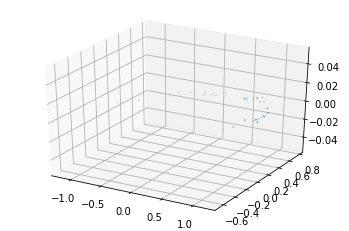

In [46]:
plt.gca(projection='3d')
ax = plt.scatter(X[:, 0],X[:, 1],X[:, 2])
plt.show()

In [16]:
X.mean(axis = 0)
x_centered = X - X.mean()
u,s,v = np.linalg.svd(x_centered)
c1 = v.T[:,0]
c2 = v.T[:,1]
print("c1 is ",c1,'c2 is ',c2)

c1 is  [0.93894372 0.2897084  0.18561717] c2 is  [-0.3275518   0.91778545  0.22445418]


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x2d = pca.fit(X)
x2d.components_
x2d_c = pca.fit(x_centered)
x2d_c.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [21]:
x2d.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [24]:
pca_de = PCA()
x2d_d = pca_de.fit(X)
x2d_d.explained_variance_ratio_

array([0.84248607, 0.14631839, 0.01119554])

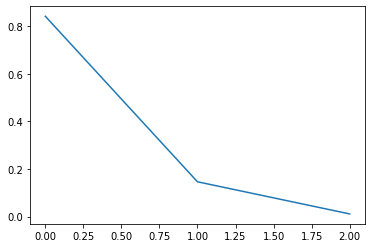

In [25]:
plt.plot(x2d_d.explained_variance_ratio_)
plt.show()

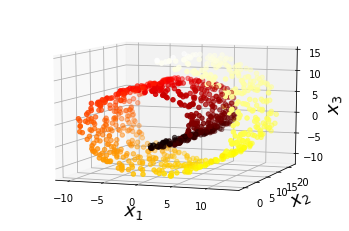

In [56]:
from sklearn.datasets import make_swiss_roll
x,t = make_swiss_roll(n_samples= 1000, noise=0.2,random_state=42)
fig = plt.figure()

axes = [-11.5, 14, -2, 23, -12, 15]
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0],x[:,1],x[:,2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


plt.show()

# 增量PCA &随机PCA
Kernal PCA

In [58]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
x_reduced = rbf_pca.fit_transform(x)

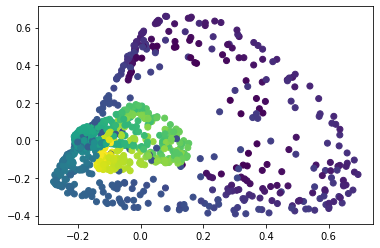

In [63]:
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=t)
plt.show()

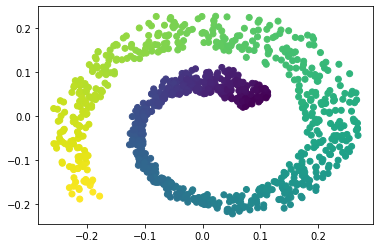

In [68]:
sig_pca = KernelPCA(n_components=2,kernel="sigmoid",gamma=0.001)
x_reduced = sig_pca.fit_transform(x)
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=t)
plt.show()

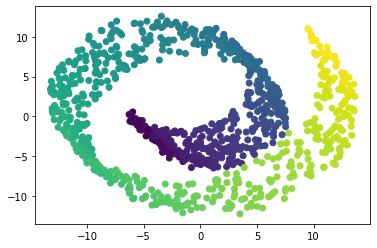

In [70]:
lin_pca = KernelPCA(n_components=2,kernel="linear")
x_reduced = lin_pca.fit_transform(x)
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=t)
plt.show()

# 局部线性嵌入, LLE
Local Linear Embeded